# Introduction To Data Science – Assignment 1

---

### Sections A – B – C – D

---

***Instructions***

Due Date: Sunday 18th September 2022 – 11:59PM

Name the file in the format Lyyxxxx and save it as .ipynb (e.g. L201234.ipynb)

Submission will be taken on **GitHub and Google Classroom (submit the .ipynb file)** - Instructions to upload onto GitHub are provided in the link https://docs.google.com/document/d/1BR1ULOGeGWJVU6Rr6Qty1FR-quVRZyRvQGII6nEs-wo/edit?usp=sharing

After uploading and submitting the .ipynb file onto Google Classroom, also private comment the link to the GitHub repository.

All source files needed to complete this assignment can be found on the following Google Drive link https://drive.google.com/drive/folders/1VrkaVcExGWqilSeh50WZe4gUBjmUiJ9b?usp=sharing

TA Emails

Section A, C - Muhammad Maarij l192347@lhr.nu.edu.pk

Section B, D - Hira Ijaz l192377@lhr.nu.edu.pk

Happy Coding 😊

---

---
## Question 1
---

Define a procedure called "check_input" that takes an input as a square list of lists (2D Matrix of N x N) and returns a boolen "true" if the input is valid or "false" otherwise, according to the following criteria.

1. Each coloumn must contain numbers from between 1 and N, with no duplicates.
2. Each row must contain numbers from between 1 and N, with no duplicates.

In [2]:
def check_input(arr):
    found = True
    n = len(arr)
    for i in range(n):
        for j in range((n-1)):
            if arr[i][j] == arr[i][j+1]:
                found = False
                break
    for i in range(n-1):
        for j in range(n):
            if arr[i+1][j] == arr[i][j]:
                found = False
                break
    return found

In [3]:
# run this block to test code after defining the procedure

test1 = [[1, 2, 3],
        [2, 3, 1],
        [3, 1, 2]]

test2 = [[1, 2, 3, 4],
        [2, 3, 1, 3],
        [3, 1, 2, 3],
        [4, 4, 4, 4]]

test3 = [['a', 'b', 'c'],
        ['b', 'c', 'a'],
        ['c', 'a', 'b']]

print(check_input(test1)) # must return true
print(check_input(test2)) # must return false
print(check_input(test3)) # must return false

True
False
True


---
## Question 2
---

**Part A** - Import the file "StudentMarkSheet.csv" as a Pandas DataFrame and print the information for the dataframe

In [11]:
from google.colab import files
uploaded = files.upload()
import pandas
import matplotlib.pyplot
import numpy
np = numpy
plt = matplotlib.pyplot
df = pandas
pd = df.read_csv("StudentMarkSheet.csv")

Saving StudentMarkSheet.csv to StudentMarkSheet.csv


**Part B** - Remove any rows that do not contain all the data. Also print the following information.

1. Number of rows before
2. Number of rows containing null data
3. Number of rows after

In [12]:
print(pd.shape)
print(pd.info())
print("the number of rows are :")
x = len(pd.index)
print(x)
y = pd.dropna()
z = len(y.index)
print("the number of rows after dropping")
print(z)

(200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student name  200 non-null    object 
 1   Exam name     199 non-null    object 
 2   Exam date     200 non-null    object 
 3   Marks         197 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.4+ KB
None
the number of rows are :
200
the number of rows after dropping
196


**Part C** - Print all the marks along with the subject for the student named "James Walker"

In [13]:
print(pd.loc[pd['Student name'] == 'James Walker'])

     Student name    Exam name   Exam date  Marks
0    James Walker      Biology  05/06/2016   31.0
42   James Walker    Chemistry  15/06/2016   61.0
71   James Walker  Mathematics  29/07/2016   23.0
150  James Walker      Physics  10/06/2016  100.0
180  James Walker    Sociology  21/06/2016   73.0


---
## Question 3
---

**Part A** - From the DataFrame created in Question 2, calculate the average marks for each subject

In [14]:
phy = pd[pd['Exam name'] == 'Physics']['Marks'].mean()
print("physics", phy)
chem = pd[pd['Exam name'] == 'Chemistry']['Marks'].mean()
print("chemistry", chem)
bio = pd[pd['Exam name'] == 'Biology']['Marks'].mean()
print("biology", bio)
philo = pd[pd['Exam name'] == 'Philosophy']['Marks'].mean()
print("philosophy", philo)
math = pd[pd['Exam name'] == 'Mathematics']['Marks'].mean()
print("Mathematics", math)
socio = pd[pd['Exam name'] == 'Sociology']['Marks'].mean()
print("Sociology", socio)

physics 51.76190476190476
chemistry 50.57692307692308
biology 47.89473684210526
philosophy 47.270270270270274
Mathematics 48.97222222222222
Sociology 56.026315789473685


**Part B** - Using the averages you just calculated, plot a Bar Graph showing the average marks of each subject

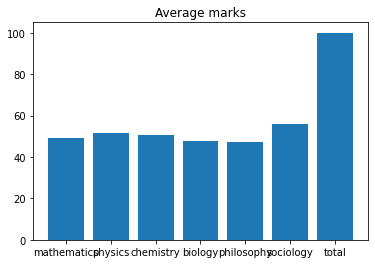

In [15]:
x = np.array(["mathematics", "physics", "chemistry",
             "biology", "philosophy", "sociology", "total"])
y = np.array([math, phy, chem, bio, philo, socio, 100])
plt.bar(x, y)
plt.title("Average marks")
plt.show()

---
## Question 4
---

**Part A** - Import the file "CatData.csv" and preprocess it to remove any null values

In [16]:
from google.colab import files
uploaded = files.upload()
import pandas as df
import matplotlib.pyplot as plt
import numpy as np
from  sklearn import linear_model
pd=df.read_csv("CatData.csv")
x=len(pd.index)
print(" number of rows before processing : ",x)
y=pd.dropna()
z=len(y.index)
print("number of rows after processing :",z)

Saving CatData.csv to CatData.csv
 number of rows before processing :  342
number of rows after processing : 342


**Part B** - Identify the independant and dependant variables (comment answer below)

In [26]:
num=int(len(pd)*0.8)
train=pd[:num]
test=pd[num:]
print(len(pd))
print("training set",len(train))
print("testing set",len(test))

342
training set 273
testing set 69


**Part C** - Create a linear regression model using sklearn and fit it to the data you just imported


In [30]:
regr=linear_model.LinearRegression()
trainx=np.array(train[['Tail Length (cm)']])
trainy= np.array(train[['Mass (kg)']])
regr.fit(trainx,trainy)
coefficients = regr.coef_
intercept =regr.intercept_


**Part D** - Print the values for slope and y-intercept

In [31]:
print("slope :",coefficients)
print("intercepts",intercept)

slope : [[0.48913766]]
intercepts [-5.57328662]


**Part E** - Plot a scatter graph of the original data and a regression line on the same figure (example with dummy data shown below)

![](https://drive.google.com/uc?export=view&id=1o_NAsNjfx7zAh9m-UjvWB3rta6uraKdY)

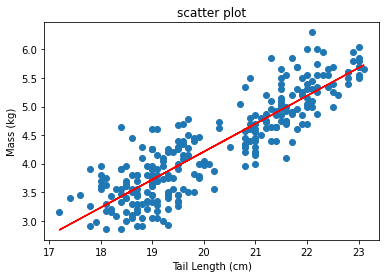

In [32]:
plt.scatter(train['Tail Length (cm)'],train['Mass (kg)'])
plt.plot(trainx,coefficients[0]*trainx+intercept,color="red")
plt.title("scatter plot")
plt.xlabel('Tail Length (cm)')
plt.ylabel('Mass (kg)')
plt.show()